In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import h5py

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow as tf

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [4]:
train['emergency_or_not'].value_counts()

0    965
1    681
Name: emergency_or_not, dtype: int64

In [5]:
test = pd.read_csv('test_vc2kHdQ.csv')

In [6]:
test

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [7]:
X,y,X_Test = [],[],[]

for img_name in os.listdir('images/'):
    if img_name in train['image_names'].values:
        img = cv2.imread(f'images/{img_name}')
        X.append(img)
        y.append(train[train['image_names'] == f'{img_name}']['emergency_or_not'].values[0])
    elif img_name in test['image_names'].values:
        img = cv2.imread(f'images/{img_name}')
        X_Test.append(img)
    else:
        print('not found')
X = np.array(X)
y = np.array(y)
X_Test = np.array(X_Test)

In [8]:
X.shape,y.shape,X_Test.shape

((1646, 224, 224, 3), (1646,), (706, 224, 224, 3))

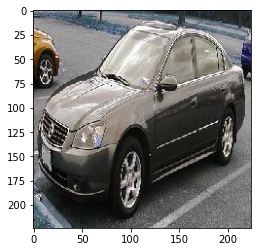

In [9]:
plt.imshow(X[5])

In [11]:
#X = X/255

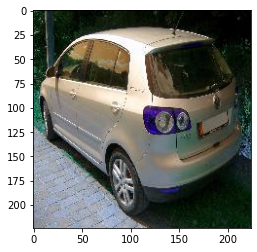

In [10]:
plt.imshow(X[7])

In [13]:

def store_many_hdf5(images, labels):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Create a new HDF5 file
    file = h5py.File(f"{num_images}_many.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    meta_set = file.create_dataset(
        "meta", np.shape(labels), h5py.h5t.STD_U8BE, data=labels
    )
    file.close()

In [12]:
def store_many_test_hdf5(images):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Create a new HDF5 file
    file = h5py.File(f"{num_images}_test_many.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    file.close()

In [14]:
store_many_hdf5(X,y)

In [13]:
store_many_test_hdf5(X_Test)